# Using meta-research to improve science - 2020
## Studying methodological citations
### Prevalence anaylysis

#### Loading Data
As a first step we load the consesus data of study 2 - prevalence

##### Imports

In [24]:
import pandas as pd
import numpy as np
from pathlib import Path
import sys

import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt

matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Arial') 

%matplotlib inline

##### Data loading

In [25]:
#specify file location
data_path = Path().home() / 'MetaScience'
data_file = 'dataset_all_fields.csv'

#load csv file -- drop empty columns and rows
#index keys = [field, journal, authors, key]
df = pd.read_csv((data_path / data_file).open('rb'), sep = ';', encoding=r'ISO-8859-1',usecols=lambda x: 'Unnamed' not in x, index_col=[5,6,10,0], na_values=['\xa0','\xCA'], engine='python')
df.dropna(how="all", inplace=True)

#shorten author names to last name of first author
replace_authour_names = {l1:l2 for l1, l2 in zip(df.index.get_level_values(2),df.index.get_level_values(2).str.split().str.get(0))}
df = df.rename(replace_authour_names)

#replace all commas with decimal point
df.replace({"7,1": 7.1, "7,2":7.2}, inplace=True)

df.head()

title  \
field   journal      authors key                                                           
biology Astrobiology White   32125196  Simulating Serpentinization as It Could Apply ...   
                     Yingst  32023426  Is a Linear or a Walkabout Protocol More Effic...   
        Biology      Arisan  32182839  Upregulated Wnt-11 and miR-21 Expression Trigg...   
                     Fanfone 32183292  Molecular Imaging of Galectin-1 Expression as ...   
                     Glazier 32106435  Effects of Fish Predators on the Mass-Related ...   

                                       year month  day  volume  issue  \
field   journal      authors key                                        
biology Astrobiology White   32125196  2020     3  NaN      20    3.0   
                     Yingst  32023426  2020     3  NaN      20    3.0   
        Biology      Arisan  32182839  2020     3    9       9    3.0   
                     Fanfone 32183292  2020     3   14       9    3.0   
                     Glazier 32106435  2020     2   25       9    3.0   

                                         pages  \
field   journal      authors key                 
biology Astrobiology White   32125196  307-326   
                     Yingst  32023426  327-348   
        Biology      Arisan  32182839      NaN   
                     Fanfone 32183292      NaN   
                     Glazier 32106435      NaN   

                                                                             url  \
field   journal      authors key                                                   
biology Astrobiology White   32125196  https://pubmed.ncbi.nlm.nih.gov/32125196/   
                     Yingst  32023426  https://pubmed.ncbi.nlm.nih.gov/32023426/   
        Biology      Arisan  32182839  https://pubmed.ncbi.nlm.nih.gov/32182839/   
                     Fanfone 32183292  https://pubmed.ncbi.nlm.nih.gov/32183292/   
                     Glazier 32106435  https://pubmed.ncbi.nlm.nih.gov/32106435/   

                                        pubmed_id      pmc_id  ...  cit_434  \
field   journal      authors key                               ...            
biology Astrobiology White   32125196  32125196.0         NaN  ...      NaN   
                     Yingst  32023426  32023426.0  PMC7071088  ...      NaN   
        Biology      Arisan  32182839  32182839.0  PMC7150874  ...      NaN   
                     Fanfone 32183292  32183292.0  PMC7150867  ...      NaN   
                     Glazier 32106435  32106435.0  PMC7150980  ...      NaN   

                                       cit_435  cit_436 cit_437 cit_438  \
field   journal      authors key                                          
biology Astrobiology White   32125196      NaN      NaN     NaN     NaN   
                     Yingst  32023426      NaN      NaN     NaN     NaN   
        Biology      Arisan  32182839      NaN      NaN     NaN     NaN   
                     Fanfone 32183292      NaN      NaN     NaN     NaN   
                     Glazier 32106435      NaN      NaN     NaN     NaN   

                                      cit_439 cit_440 cit_441 cit_442 cit_443  
field   journal      authors key                                               
biology Astrobiology White   32125196     NaN     NaN     NaN     NaN     NaN  
                     Yingst  32023426     NaN     NaN     NaN     NaN     NaN  
        Biology      Arisan  32182839     NaN     NaN     NaN     NaN     NaN  
                     Fanfone 32183292     NaN     NaN     NaN     NaN     NaN  
                     Glazier 32106435     NaN     NaN     NaN     NaN     NaN  

[5 rows x 457 columns]

In [26]:
# Change column names to MethodCit, Cit_Reason, and Cit_SC
new_cols = []
skip_cols = 0
names = ['MethCit{}', 'Cit{}_Reason', 'Cit{}_SC']
for c in df.columns:
    if not 'cit' in c: #skip columns that aren't citations
        new_cols.append(c)
        skip_cols += 1
    else:
        num = ''.join(filter(str.isdigit, c)) #if it is citation take its index
        if num:
            num = int(num) #every three entries, the column names repeat
            name = names[(num-1)%3].format((num-1)//3 + 1)
            new_cols.append(name)
df.columns = new_cols
df.iloc[:,14:24].head()

MethCit1  \
field   journal      authors key                                                           
biology Astrobiology White   32125196  The previously reported JPL hydrothermal react...   
                     Yingst  32023426  The walkabout approach provides an overview of...   
        Biology      Arisan  32182839  The resulting cDNA was used to assess the expr...   
                     Fanfone 32183292  SA, ABCR, Karlsruhe, Germany) exposing carboxy...   
                     Glazier 32106435  G. minusis an omnivorous scavenger that common...   

                                      Cit1_Reason   Cit1_SC  \
field   journal      authors key                              
biology Astrobiology White   32125196           7       NaN   
                     Yingst  32023426           1  possible   
        Biology      Arisan  32182839           1  probable   
                     Fanfone 32183292           1  probable   
                     Glazier 32106435           6       NaN   

                                                                                MethCit2  \
field   journal      authors key                                                           
biology Astrobiology White   32125196  Previously, we reported results from reactor e...   
                     Yingst  32023426  For this mission, the science operations proce...   
        Biology      Arisan  32182839   The relative expression of miR-21was normaliz...   
                     Fanfone 32183292  amine groups exposed by PEG following the tech...   
                     Glazier 32106435  These springs are physicallyand chemically sim...   

                                      Cit2_Reason   Cit2_SC  \
field   journal      authors key                              
biology Astrobiology White   32125196           6       NaN   
                     Yingst  32023426           7       NaN   
        Biology      Arisan  32182839           1  probable   
                     Fanfone 32183292           1  probable   
                     Glazier 32106435           6       NaN   

                                                                                MethCit3  \
field   journal      authors key                                                           
biology Astrobiology White   32125196  Here, we use synthetic and field minerals expe...   
                     Yingst  32023426  In prior field tests (Yingst et al., 2011, 201...   
        Biology      Arisan  32182839  Cell invasion assays were performed as describ...   
                     Fanfone 32183292  okyo, Japan) as a coupling agent [35,36] (Sche...   
                     Glazier 32106435  However, three of the springs (Ell, Blue and W...   

                                      Cit3_Reason   Cit3_SC  \
field   journal      authors key                              
biology Astrobiology White   32125196           1  possible   
                     Yingst  32023426           6       NaN   
        Biology      Arisan  32182839           1  possible   
                     Fanfone 32183292           1  probable   
                     Glazier 32106435           6       NaN   

                                                                                MethCit4  
field   journal      authors key                                                          
biology Astrobiology White   32125196  Pentlandite (iron/nickel sulfide) was added as...  
                     Yingst  32023426  In the most recent test, the team found that t...  
        Biology      Arisan  32182839                                                NaN  
                     Fanfone 32183292  of peptide molecules coupled per USPIO particl...  
                     Glazier 32106435  Our study springs are useful because their sim...

In [34]:
def is_float(val):
    """
    Function to check whether a data entry is numerical by
    trying to cast it to float
    
    Args
        val: value to check
    
    Returns
        Boolean indicating whether input is numerical
    """    
    try:
        float(val)
    except:
        return False
    else:
        return True

def to_numeric(x):
    """
    Takes row as input and checks for non-numerical values
    Prints all entries that are non-numerical for cleaning
    
    Args
        x: dataframe row with citation classifications
    
    Returns
        Index of non-numerical entries
    """
    numerics = np.vectorize(is_float, otypes = [bool])(x)
    if not all(numerics):
        print(x[~numerics], x.shape)
        return x.index

# Applies check to all columns that specify citation reasons    
indices = df.filter(regex='Reason').apply(to_numeric,axis=1)
indices_additional = df.loc[:,'is_cov':'is_repo'].apply(to_numeric,axis=0)

##### Preprocessing

In [39]:
# Count citations per row
def get_last_citation(x):
    """
    Calculates number of citations per entry
    
    Args
        x: dataframe row 
        
    Returns
        The last valid citation index as count of citations per row
    """
    #last citation that is not NaN
    last = x.filter(regex='MethCit').last_valid_index()
    if last:
        num = ''.join(filter(str.isdigit, last)) #take digit as count
        if num == '':
            return 0
        return int(num) #return cound
    return 0

# Append number of citations as column
df['num_citations'] = df.apply(get_last_citation, axis=1)   

In [40]:
# Count probable and possible shortcuts
def get_shortcuts(x):
    """
    Find number of possible and probable shortcuts in each row
    
    Args
        x: dataframe row
        
    Returns
        Number of possible, probable, and total number of shortcuts
    """
    #sum all columns that contain possible and probable respecitvely
    possible = x.isin(['possible']).sum()
    probable = x.isin(['probable']).sum()
    
    #return counts for row
    return pd.Series({'num_possible': possible, 'num_probable': probable, 'total_shortcuts': possible+probable})

# Append new variables to dataframe
df = pd.concat([df,df.apply(get_shortcuts, axis=1)],axis=1)

##### Create quintiles of total shortcuts for sampling

For study 1 - case study, articles are sorted into quintiles by total number of shortcuts. Then 10 random samples are taken per field for create candidate articles for the three different fields

In [188]:
# Calculate quintiles
df['quintile'] = df.groupby('field')['total_shortcuts'].transform(lambda x: pd.qcut(x,5,labels=False))

# Sample 10 random articles per quintile
samples = df.groupby(['field','quintile']).sample(10,random_state=42).loc[:,['title','total_shortcuts','quintile']]

#Save as excel sheet
samples.loc[['neuroscience','biology','psychiatry']].to_excel(data_path / 'random_samples_all.xlsx')

##### Plotting

In [45]:
#We define colors to be used in all plots
Neuro_7colors = np.array(['#FFFCEB',
                            '#FFF6C2',
                            '#FFED85',
                            '#FFE347',
                            '#E0BF00',
                            '#B89C00',
                            '#8F7900'])

Psych_7colors = np.array(['#FFEEEB',
                            '#FFCBC2',
                            '#FF9785',
                            '#FF6347',
                            '#E02200',
                            '#B81C00',
                            '#8F1500'])

Bio_7colors = np.array(['#EDF3FD',
                            '#C8DAF9',
                            '#90B5F3',
                            '#598FEE',
                            '#1558CB',
                            '#1248A5',
                            '#0E3881'])

Neuro_4colors =  Neuro_7colors[[0, 2, 4, 6]]
Psych_4colors =  Psych_7colors[[0, 2, 4, 6]]
Bio_4colors =  Bio_7colors[[0, 2, 4, 6]]

Neuro_3colors =  Neuro_7colors[[0, 3, 6]]
Psych_3colors =  Psych_7colors[[0, 3, 6]]
Bio_3colors =  Bio_7colors[[0, 3, 6]]

Neuro_1color =  Neuro_7colors[3]
Psych_1color =  Psych_7colors[3]
Bio_1color =  Bio_7colors[3]

Create figure of counts for Method supplements and repositories

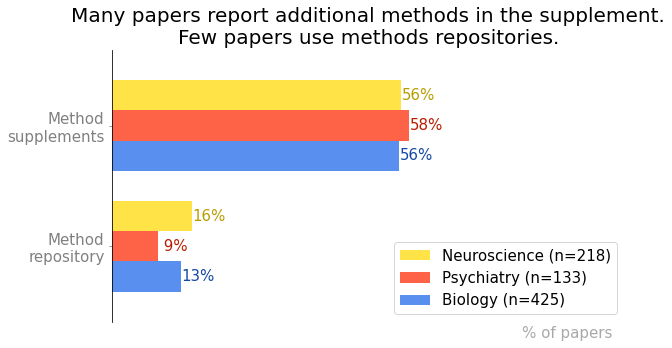

In [48]:

fig, ax = plt.subplots(figsize=(9.2, 5))

labels = ['Method\nrepository','Method\nsupplements']

bar_size = 0.25
padding = 0.25

y_locs = np.arange(len(labels)) * (bar_size * 3 + padding)

#calculate percentages of method supplements and repositories for biology
supp = df.loc['biology'].is_supp.value_counts()
supp = supp/supp.sum()*100
repo = df.loc['biology'].is_repo.value_counts()
repo = repo/repo.sum()*100

#create bar graph
bio = [repo.at[1],supp.at[1]]
ax.barh(y_locs, bio , align='edge', height=bar_size, color=Bio_1color, label=f"Biology (n={len(df.loc['biology'])})")
for i, v in enumerate(bio):
    plt.text(v + 0.2, y_locs[i]+0.5*padding, "{:2.0f}%".format(v), fontsize=15, color=Bio_7colors[5], va="center")

#calculate percentages of method supplements and repositories for pschiatry
supp = df.loc['psychiatry'].is_supp.value_counts()
supp = supp/supp.sum()*100
repo = df.loc['psychiatry'].is_repo.value_counts()
repo = repo/repo.sum()*100

psych = [repo.at[1],supp.at[1]]
ax.barh(y_locs + bar_size, psych, align='edge', height=bar_size, color=Psych_1color, label=f"Psychiatry (n={len(df.loc['psychiatry'])})")
for i, v in enumerate(psych):
    plt.text(v + 0.2, y_locs[i]+bar_size+0.5*padding, "{:2.0f}%".format(v), fontsize=15, color=Psych_7colors[5], va="center")

#calculate percentages of method supplements and repositories for neuroscience 
supp = df.loc['neurobiology'].is_supp.value_counts()
supp = supp/supp.sum()*100
repo = df.loc['neurobiology'].is_repo.value_counts()
repo = repo/repo.sum()*100

neuro = [repo.at[1],supp.at[1]]
ax.barh(y_locs + 2*bar_size, neuro, align='edge', height=bar_size, color=Neuro_1color, label=f"Neuroscience (n={len(df.loc['neurobiology'])})")
for i, v in enumerate(neuro):
    plt.text(v + 0.2, y_locs[i]+2*bar_size+0.5*padding, "{:2.0f}%".format(v), fontsize=15, color=Neuro_7colors[5], va="center")

ax.set(yticks=y_locs+ bar_size + 0.5*padding, yticklabels=labels, ylim=[0 - padding, len(y_locs)])
ax.set_xlim([0,100])

ax.set_title("Many papers report additional methods in the supplement.\nFew papers use methods repositories.",  fontsize=20)
ax.set_xlabel("% of papers", horizontalalignment='right',x=0.975, fontsize=15, color='darkgrey')
# ax.tick_params(labelsize=15)
ax.set_xticks([])
ax.tick_params(axis='y', labelsize=15, colors='grey')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.box(on=None)


ax.legend()
handles,labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1], fontsize=15)

#save figure
fig.savefig('repos.svg', bbox_inches='tight')

In [94]:
df.loc['biology'].filter(regex='Reason').loc[df.loc['biology'].num_citations!=df.loc['biology'].filter(regex='Reason').astype(np.float).notna().sum(axis=1)].dropna(how='all',axis=1)

Cit1_Reason  \
journal                                            authors            key                    
Communications biology                             Palanikumar        32127636           1   
                                                   Zhou               32139868           1   
Current biology : CB                               RodrÃ­guez-GarcÃ­a 32032506           7   
eLife                                              Lacin              32216875           7   
FASEB journal : official publication of the Fed... Fang               31989709           1   
                                                   Song               32039519         NaN   
Geobiology                                         Feenstra           32011795           6   
                                                   Lin                31814266         7.1   
                                                   Moore              32048807         7.1   
Philosophical transactions of the Royal Society... Goubert            32075552           7   
                                                   Griscom            31983330           6   

                                                                               Cit2_Reason  \
journal                                            authors            key                    
Communications biology                             Palanikumar        32127636           1   
                                                   Zhou               32139868           1   
Current biology : CB                               RodrÃ­guez-GarcÃ­a 32032506           7   
eLife                                              Lacin              32216875           7   
FASEB journal : official publication of the Fed... Fang               31989709           1   
                                                   Song               32039519         NaN   
Geobiology                                         Feenstra           32011795           1   
                                                   Lin                31814266           6   
                                                   Moore              32048807           6   
Philosophical transactions of the Royal Society... Goubert            32075552         7.1   
                                                   Griscom            31983330           1   

                                                                               Cit3_Reason  \
journal                                            authors            key                    
Communications biology                             Palanikumar        32127636           6   
                                                   Zhou               32139868           7   
Current biology : CB                               RodrÃ­guez-GarcÃ­a 32032506           1   
eLife                                              Lacin              32216875           7   
FASEB journal : official publication of the Fed... Fang               31989709         NaN   
                                                   Song               32039519         NaN   
Geobiology                                         Feenstra           32011795         NaN   
                                                   Lin                31814266         NaN   
                                                   Moore              32048807           6   
Philosophical transactions of the Royal Society... Goubert            32075552         7.1   
                                                   Griscom            31983330           6   

                                                                               Cit4_Reason  \
journal                                            authors            key                    
Communications biology                             Palanikumar        32127636         NaN   
                                                   Zhou               32139868           1   
Current biology : CB              

In [117]:
df.loc['psychiatry'].filter(regex='Reason').loc[df.loc['psychiatry'].num_citations!=df.loc['psychiatry'].filter(regex='Reason').astype(np.float).notna().sum(axis=1)].dropna(how='all',axis=1)

,,,Cit1_Reason,Cit2_Reason,Cit3_Reason,Cit4_Reason,Cit5_Reason,Cit6_Reason,Cit7_Reason,Cit8_Reason,Cit9_Reason,Cit10_Reason,...,Cit18_Reason,Cit19_Reason,Cit20_Reason,Cit21_Reason,Cit22_Reason,Cit23_Reason,Cit24_Reason,Cit25_Reason,Cit26_Reason,Cit27_Reason
journal,authors,key,,,,,,,,,,,,,,,,,,,,,
Schizophrenia bulletin,Jalbrzikowski,31424081,8,4,1,1,1,1,1,6,1,1,...,6,8,6,8,6,6,6,7.2,8,6


In [132]:
bio_counts = df.loc['biology'].filter(regex='Reason').astype(np.float).apply(pd.Series.value_counts).sum(axis=1)
bio_total = bio_counts.sum()
bio_perc = bio_counts/bio_total*100
bio_perc = bio_perc.rename(index={13.0: 7.1, 14.0:7.2}).reset_index().replace([1.0,2.0,3.0,4.0],1.0).groupby('index').sum()
bio_perc = bio_perc.reindex([1.0,7.0,7.1,7.2,8.0,9.0,6.0,10.0])

psych_counts = df.loc['psychiatry'].filter(regex='Reason').astype(np.float).apply(pd.Series.value_counts).sum(axis=1)
psych_total = psych_counts.sum()
psych_perc = psych_counts/psych_total*100
psych_perc = psych_perc.rename(index={13.0: 7.1, 14.0:7.2}).reset_index().replace([1.0,2.0,3.0,4.0],1.0).groupby('index').sum()
psych_perc = psych_perc.reindex([1.0,7.0,7.1,7.2,8.0,9.0,6.0,10.0])

neuro_counts = df.loc['neurobiology'].filter(regex='Reason').astype(np.float).apply(pd.Series.value_counts).sum(axis=1)
neuro_total = neuro_counts.sum()
neuro_perc = neuro_counts/neuro_total*100
neuro_perc = neuro_perc.rename(index={13.0: 7.1, 14.0:7.2}).reset_index().replace([1.0,2.0,3.0,4.0],1.0).groupby('index').sum()
neuro_perc = neuro_perc.reindex([1.0,7.0,7.1,7.2,8.0,9.0,6.0,10.0])

totals = [neuro_total, bio_total, psych_total]
percs = [neuro_perc, bio_perc, psych_perc]
lefts = np.max(pd.concat(percs,axis=1).to_numpy(),axis=1)
lengths = [len(df.loc['neurobiology']), len(df.loc['biology']), len(df.loc['psychiatry'])]

In [133]:
lengths

[218, 425, 133]

posx and posy should be finite values
posx and posy should be finite values


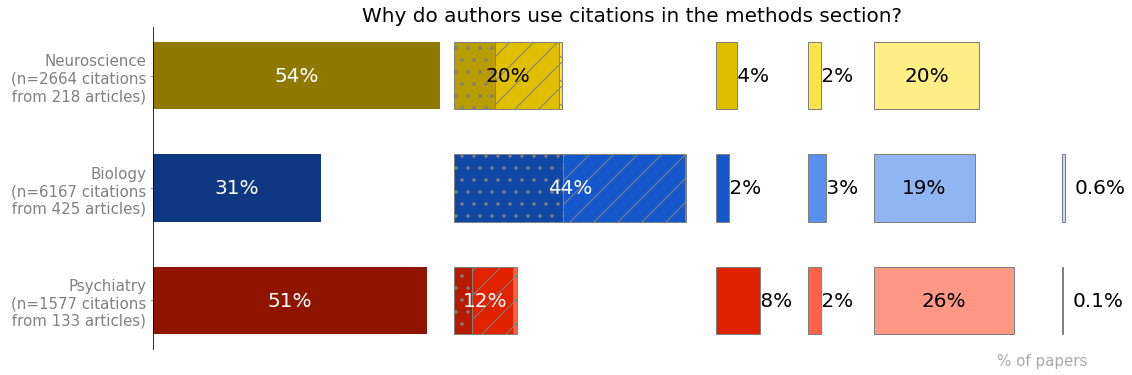

In [134]:
fields = ['Neuroscience', 'Biology', 'Psychiatry']
categories = ['method (1-4)', 'credit (7)', 'software (7.1)', 'atlas (7.2)', 'source (8)', 'formula (9)', 'info (6)', 'other (10)']
num_short_cats = 1

patterns = patterns = ['.', "/" , "x"]
plt.rcParams.update({'hatch.color': 'red'})

fontsize = 20
cmaps = [Neuro_7colors[::-1], Bio_7colors[::-1], Psych_7colors[::-1]]
fig, ax = plt.subplots(figsize=(15.2,5))
for fi,field in enumerate(fields):
    l = 0
    p = 0
    c = -1
    sevens = 0
    ec = None
    gap = 2.5
    va = ha = 'center'
    
    label = f'{field}\n(n={totals[fi]:.0f} citations\n from {lengths[fi]} articles)'
    for i,v in enumerate(percs[fi].values.squeeze()):
        if 7.0 <= percs[fi].index[i] < 8.0 :
            ax.barh(label,v,left=l,height=.6, color=cmaps[fi][1+p],label=categories[i], edgecolor='grey', hatch=patterns[p])
    
            p += 1
            l += v 
            sevens += v
            if percs[fi].index[i]==7.2:
                xcenter = lefts.cumsum()[0] + 2.5 + sevens/2 
                r, g, b,_ = colors.to_rgba(cmaps[fi][1],alpha=None)
                text_color = 'black' if fi < 1 else 'white'
                ax.text(xcenter, fi, f'{sevens:2.0f}%', ha=ha, va=va,
                    color=text_color,fontsize=fontsize)  
            
                l = lefts.cumsum()[i] + i*gap 
                gap = 9
#                 ha = 'left'
        else:
            xcenter = l+v/2 if v > 10 else l+v+2.5
            c += 1 + 1*(i==4)
            ax.barh(label,v,left=l,height=.6, color=cmaps[fi][c],label=categories[i], edgecolor=ec)   
           
            r, g, b,_ = colors.to_rgba(cmaps[fi][c],alpha=None)
            text_color = 'black' if i > 3 else 'white'#*g*b > 0.001 else 'white'
            s = f'{v:2.0f}%' 
            if v < 1:
                s = f'{v:2.1f}%'
                xcenter += 4
            ax.text(xcenter, fi, s, ha=ha, va=va,
                color=text_color,fontsize=fontsize)   
                   
            l += lefts[i]+gap#v[0]
            
        if i == num_short_cats-1:
            ec = 'grey'

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))            
# legend = ax.legend(by_label.values(), by_label.keys(),ncol=len(categories)//2+1, bbox_to_anchor=(0.175, -0.25),
#           loc='lower left', fontsize='small', fancybox=True)


plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title('Why do authors use citations in the methods section?', fontsize=20)
ax.set_xlabel('% of papers', horizontalalignment='right',x=0.975, fontsize=15, color='darkgrey')
ax.set_xticks([])
ax.tick_params(axis='y', labelsize=15, colors='grey')

ax.invert_yaxis()
# fig.savefig('categories.png', bbox_inches='tight', dpi=600)

In [491]:
category_data = pd.concat([neuro_perc,psych_perc.set_index('index'),bio_perc.set_index('index')],axis=1)
category_data.columns =fields

In [494]:
print(category_data.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Neuroscience &  Psychiatry &    Biology \\
\midrule
1.0  &     50.225225 &   44.421629 &  30.795781 \\
2.0  &      0.187688 &    0.547570 &   0.038351 \\
3.0  &      1.126126 &    3.696099 &   0.345158 \\
4.0  &      2.027027 &    3.148528 &   0.306807 \\
6.0  &     19.819820 &   24.845996 &  18.235858 \\
7.0  &      7.732733 &    3.559206 &  21.303931 \\
7.1  &     12.012012 &    8.145106 &  22.818792 \\
7.2  &      0.600601 &    0.821355 &   0.191755 \\
8.0  &      3.791291 &    8.624230 &   1.840844 \\
9.0  &      2.477477 &    2.053388 &   3.624161 \\
10.0 &           NaN &    0.136893 &   0.498562 \\
\bottomrule
\end{tabular}

